In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
# Load the data
df = pd.read_csv(r"C:\Users\kumar\Desktop\expense_tracker.csv")

In [3]:
# Data Cleaning
# Convert Date to datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [4]:
# Extract month and year for analysis
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Month-Year'] = df['Date'].dt.to_period('M')

In [5]:
# Check for duplicates
print(f"Duplicate rows: {df.duplicated().sum()}")

Duplicate rows: 0


In [6]:
# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
Date              0
Account           0
Category          0
Note              4
INR               0
Income/Expense    0
Amount            0
Currency          0
Account.1         0
Month             0
Year              0
Month-Year        0
dtype: int64


In [7]:
# Basic Statistics
print("\nBasic Statistics:")
print(df.describe())


Basic Statistics:
                                Date           INR        Amount  \
count                            277    277.000000    277.000000   
mean   2022-01-07 05:28:07.581227520    410.750903    406.759134   
min              2021-11-21 13:30:00      3.000000      3.000000   
25%              2021-12-12 21:47:00     50.000000     50.000000   
50%              2022-01-04 22:10:00    128.000000    125.000000   
75%              2022-01-28 21:58:00    301.150000    300.000000   
max              2022-03-02 10:11:00  10000.000000  10000.000000   
std                              NaN   1065.756569   1065.158318   

          Account.1       Month         Year  
count    277.000000  277.000000   277.000000  
mean     406.759134    6.043321  2021.552347  
min        3.000000    1.000000  2021.000000  
25%       50.000000    1.000000  2021.000000  
50%      125.000000    2.000000  2022.000000  
75%      300.000000   12.000000  2022.000000  
max    10000.000000   12.000000  2022.0

In [8]:
# Separate income and expenses
income_df = df[df['Income/Expense'] == 'Income']
expense_df = df[df['Income/Expense'] == 'Expense']

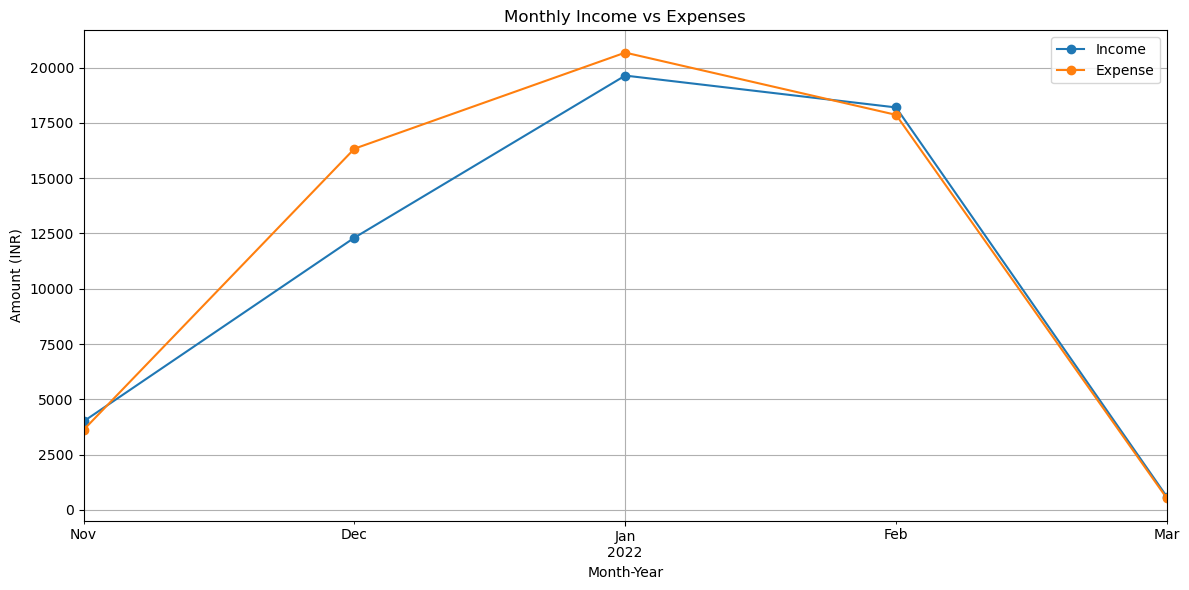

In [9]:
# Analysis 1: Monthly Income vs Expenses
monthly_income = income_df.groupby('Month-Year')['INR'].sum()
monthly_expense = expense_df.groupby('Month-Year')['INR'].sum()

plt.figure(figsize=(12, 6))
monthly_income.plot(kind='line', marker='o', label='Income')
monthly_expense.plot(kind='line', marker='o', label='Expense')
plt.title('Monthly Income vs Expenses')
plt.xlabel('Month-Year')
plt.ylabel('Amount (INR)')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

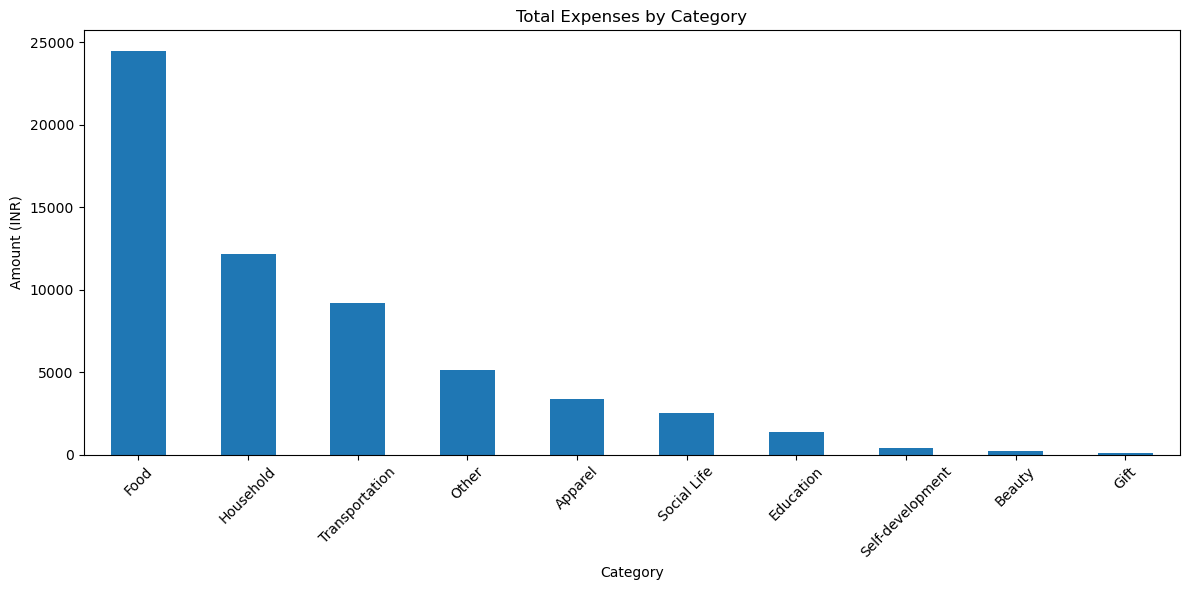

In [10]:
# Analysis 2: Expense Categories Breakdown
category_expense = expense_df.groupby('Category')['INR'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
category_expense.plot(kind='bar')
plt.title('Total Expenses by Category')
plt.xlabel('Category')
plt.ylabel('Amount (INR)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

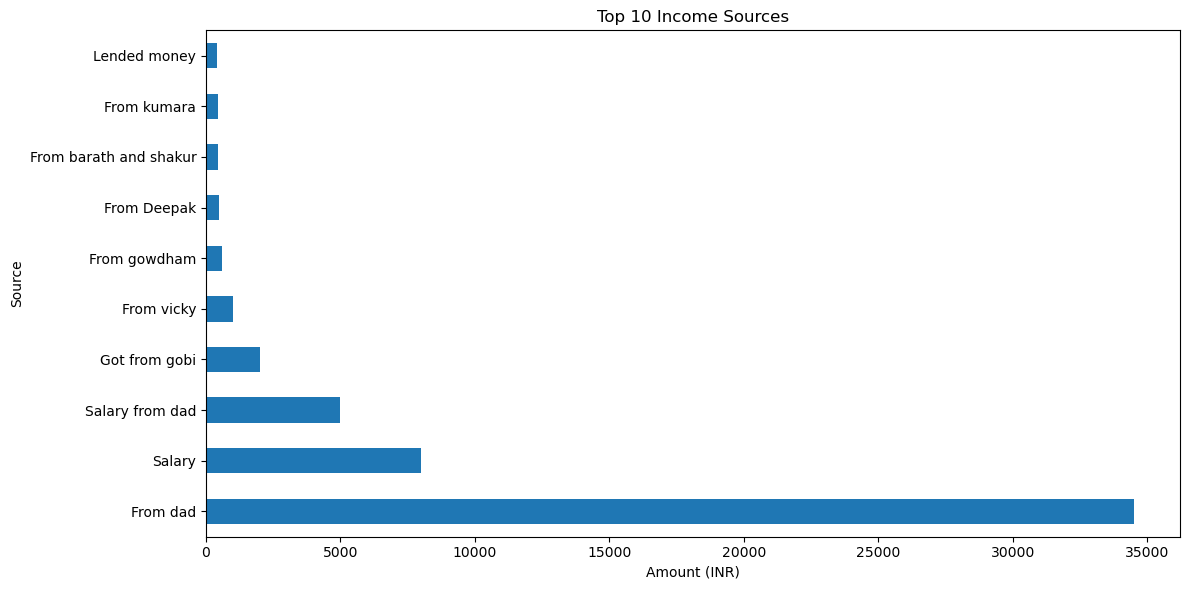

In [11]:
# Analysis 3: Top Income Sources
income_sources = income_df.groupby('Note')['INR'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
income_sources.plot(kind='barh')
plt.title('Top 10 Income Sources')
plt.xlabel('Amount (INR)')
plt.ylabel('Source')
plt.tight_layout()
plt.show()

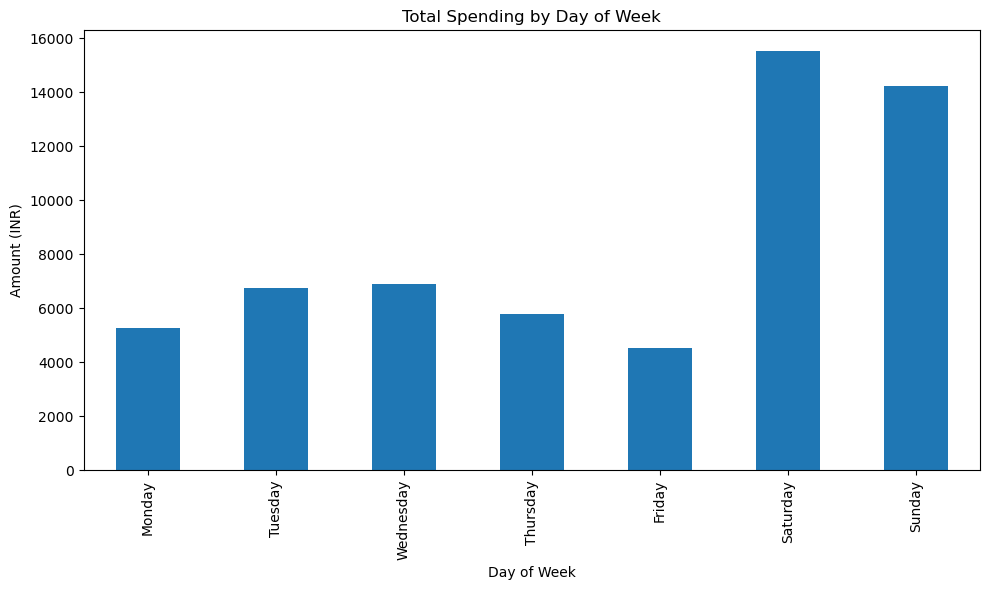

In [19]:
# Analysis 4: Daily Spending Pattern


# First ensure we're working with a proper DataFrame copy
expense_df = df[df['Income/Expense'] == 'Expense'].copy()

# Now safely add new column
expense_df['DayOfWeek'] = expense_df['Date'].dt.day_name()

# Group by day of week with correct column names
daily_spending = expense_df.groupby('DayOfWeek')['INR'].sum().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

# Create the plot
plt.figure(figsize=(10, 6))
daily_spending.plot(kind='bar')  # Fixed 'time' to 'kind'
plt.title('Total Spending by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Amount (INR)')  # Fixed 'TNR' to 'INR'
plt.tight_layout()
plt.show()

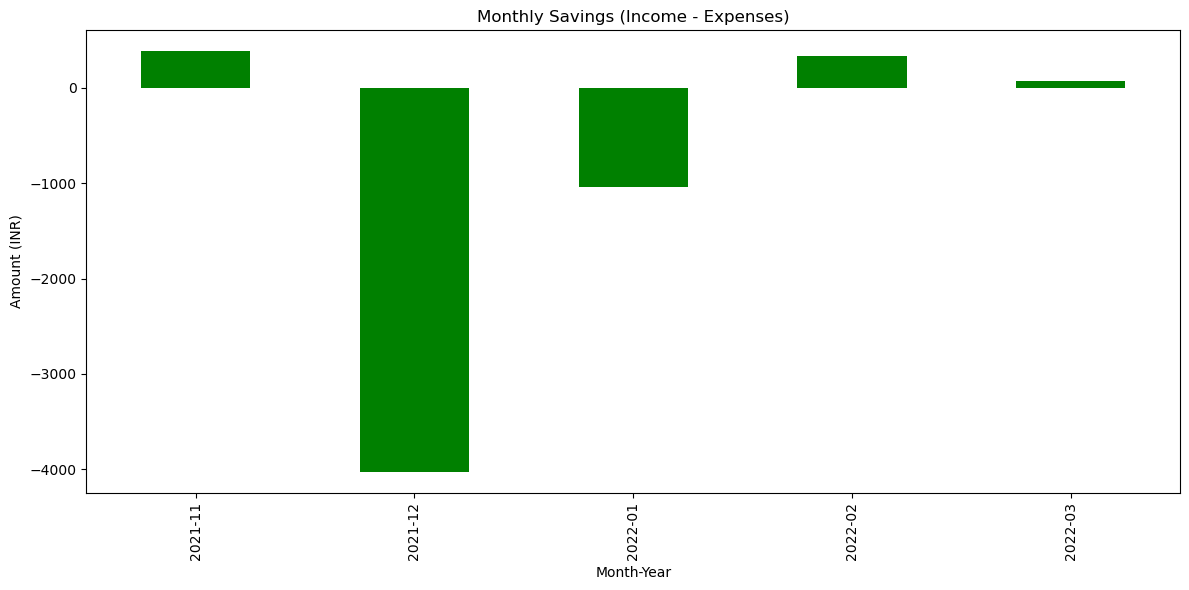

In [13]:
# Analysis 5: Monthly Savings
monthly_savings = monthly_income - monthly_expense

plt.figure(figsize=(12, 6))
monthly_savings.plot(kind='bar', color='green')
plt.title('Monthly Savings (Income - Expenses)')
plt.xlabel('Month-Year')
plt.ylabel('Amount (INR)')
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

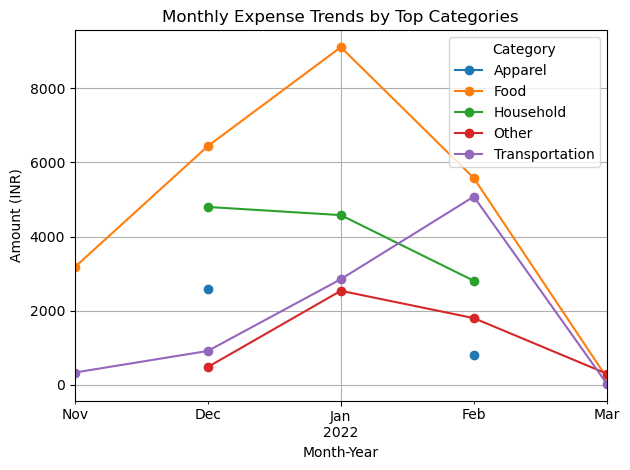

In [14]:
# Analysis 6: Expense Category Trends Over Time
top_categories = expense_df['Category'].value_counts().head(5).index.tolist()
category_monthly = expense_df[expense_df['Category'].isin(top_categories)].groupby(['Month-Year', 'Category'])['INR'].sum().unstack()

plt.figure(figsize=(12, 6))
category_monthly.plot(kind='line', marker='o')
plt.title('Monthly Expense Trends by Top Categories')
plt.xlabel('Month-Year')
plt.ylabel('Amount (INR)')
plt.legend(title='Category')
plt.grid()
plt.tight_layout()
plt.show()

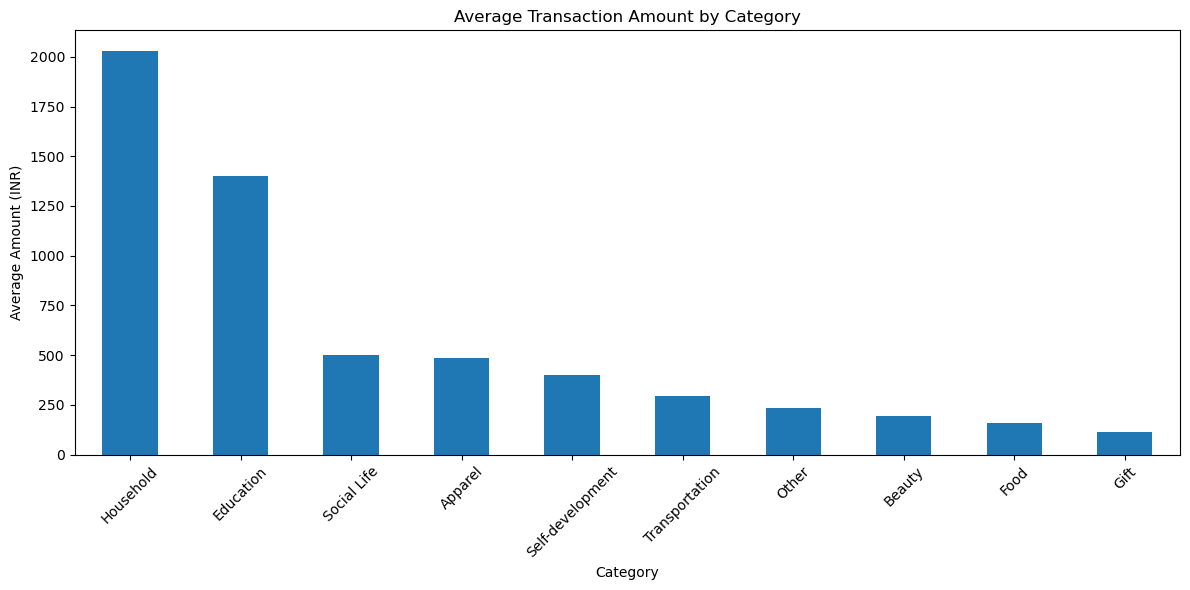

In [15]:
# Analysis 7: Average Transaction Amount by Category
avg_expense = expense_df.groupby('Category')['INR'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
avg_expense.plot(kind='bar')
plt.title('Average Transaction Amount by Category')
plt.xlabel('Category')
plt.ylabel('Average Amount (INR)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

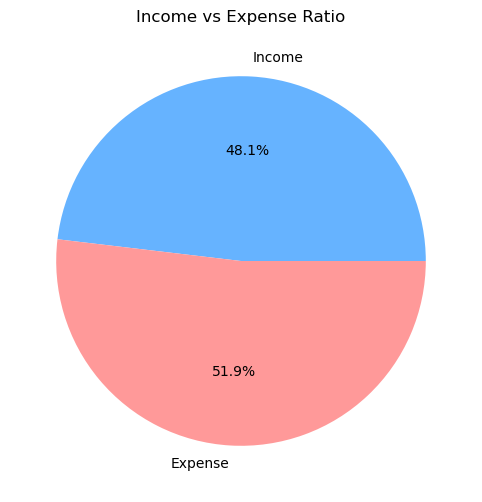

In [16]:
# Analysis 8: Income vs Expense Ratio
total_income = income_df['INR'].sum()
total_expense = expense_df['INR'].sum()

plt.figure(figsize=(8, 6))
plt.pie([total_income, total_expense], 
        labels=['Income', 'Expense'], 
        autopct='%1.1f%%',
        colors=['#66b3ff','#ff9999'])
plt.title('Income vs Expense Ratio')
plt.show()

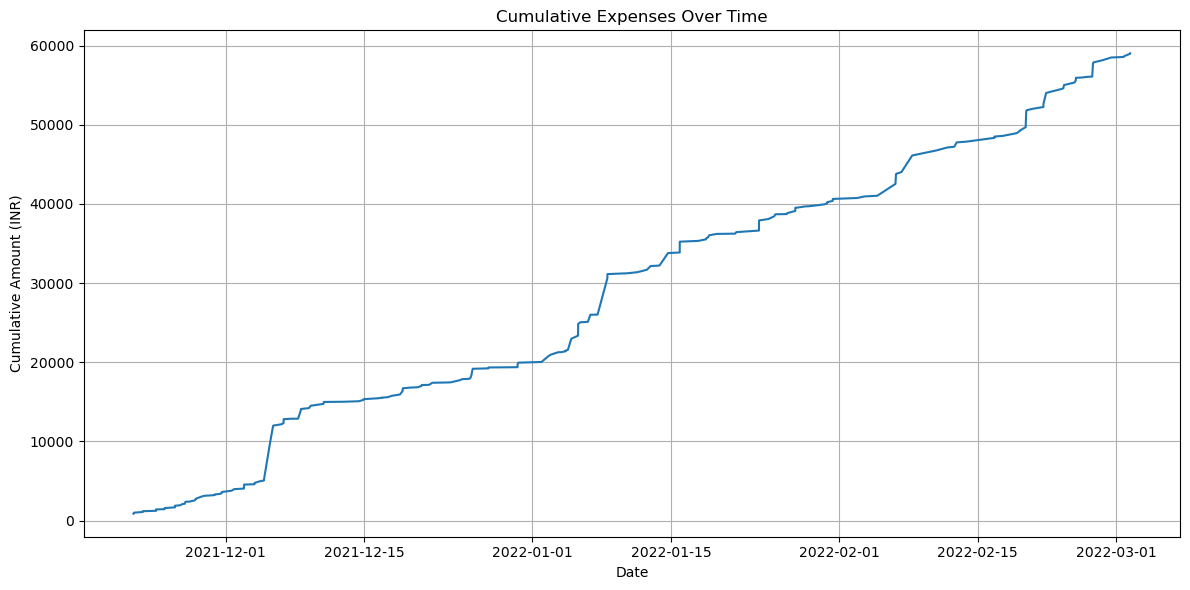

In [17]:
# Analysis 9: Cumulative Expenses Over Time
expense_df_sorted = expense_df.sort_values('Date')
expense_df_sorted['Cumulative'] = expense_df_sorted['INR'].cumsum()

plt.figure(figsize=(12, 6))
plt.plot(expense_df_sorted['Date'], expense_df_sorted['Cumulative'])
plt.title('Cumulative Expenses Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Amount (INR)')
plt.grid()
plt.tight_layout()
plt.show()

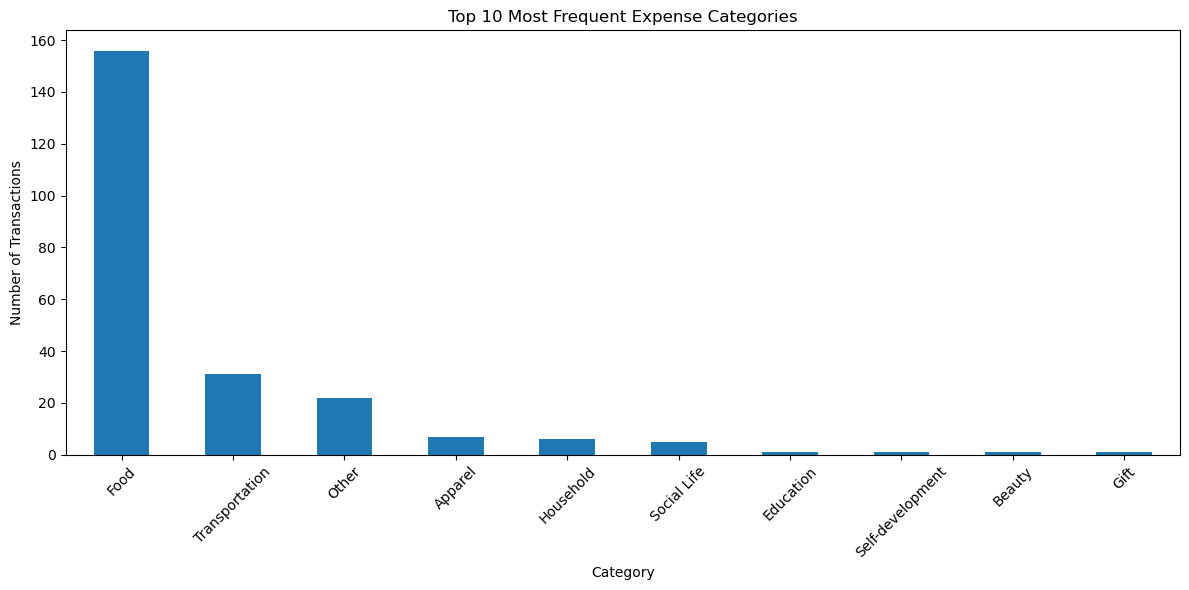

In [18]:
# Analysis 10: Top 10 Most Frequent Expense Categories
freq_categories = expense_df['Category'].value_counts().head(10)

plt.figure(figsize=(12, 6))
freq_categories.plot(kind='bar')
plt.title('Top 10 Most Frequent Expense Categories')
plt.xlabel('Category')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()